In [282]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle

In [283]:
df = quandl.get('WIKI/GOOGL')

In [284]:
df.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-04,1027.80,1031.34,1009.22,1011.87,1896325.0,0.0,1.0,1027.80,1031.34,1009.22,1011.87,1896325.0
2017-12-05,1010.99,1036.68,1002.32,1019.60,1927802.0,0.0,1.0,1010.99,1036.68,1002.32,1019.60,1927802.0
2017-12-06,1016.52,1039.58,1015.31,1032.72,1369276.0,0.0,1.0,1016.52,1039.58,1015.31,1032.72,1369276.0
2017-12-07,1036.07,1048.92,1035.36,1044.57,1437448.0,0.0,1.0,1036.07,1048.92,1035.36,1044.57,1437448.0
2017-12-08,1051.81,1056.42,1045.86,1049.38,1479665.0,0.0,1.0,1051.81,1056.42,1045.86,1049.38,1479665.0
2017-12-11,1051.11,1056.00,1044.12,1051.97,1096997.0,0.0,1.0,1051.11,1056.00,1044.12,1051.97,1096997.0
2017-12-12,1050.00,1062.50,1044.87,1048.77,1684977.0,0.0,1.0,1050.00,1062.50,1044.87,1048.77,1684977.0
2017-12-13,1052.08,1055.48,1046.58,1051.39,1369580.0,0.0,1.0,1052.08,1055.48,1046.58,1051.39,1369580.0
2017-12-14,1055.49,1067.08,1053.60,1057.47,1531504.0,0.0,1.0,1055.49,1067.08,1053.60,1057.47,1531504.0


In [285]:
df.shape

(3356, 12)

In [286]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [287]:
df.tail()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2017-12-11,1051.11,1056.00,1044.12,1051.97,1096997.0
2017-12-12,1050.00,1062.50,1044.87,1048.77,1684977.0
2017-12-13,1052.08,1055.48,1046.58,1051.39,1369580.0
2017-12-14,1055.49,1067.08,1053.60,1057.47,1531504.0
2017-12-15,1063.78,1075.25,1060.09,1072.00,3080738.0


In [288]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Low']*100.0

In [289]:
df['PCT_CHG'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0

In [290]:
df = df[['Adj. Close','HL_PCT','PCT_CHG','Adj. Volume']]

In [291]:
forecast_col ='Adj. Close'
df.fillna(-99999, inplace=True)

In [292]:
forecast_out = int(math.ceil(0.003*len(df)))

In [293]:
len(df)*0.003,forecast_out

(10.068, 11)

In [294]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [295]:
X = np.array(df.drop(['label'],1))

In [296]:
X = preprocessing.scale(X)

In [297]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [298]:
df.dropna(inplace=True)

In [299]:
y = np.array(df['label'])

In [300]:
len(X), len(y)

(3345, 3345)

In [301]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [303]:
clf = LinearRegression()
clf.fit(X_train, y_train)

with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
    
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

In [304]:
accuracy=clf.score(X_test, y_test)
print(accuracy)

0.991281977664


In [305]:
forecast_set=clf.predict(X_lately)
df['forecast'] = np.nan

In [306]:
last_date = df.iloc[-1].name
one_day = 86400

In [307]:
last_unix = last_date.timestamp()

In [308]:
next_unix = last_unix + one_day

In [309]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] 

In [310]:
%matplotlib inline

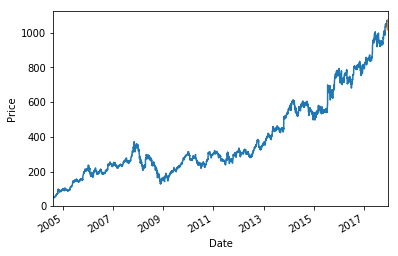

In [315]:
df['Adj. Close'].plot()
df['forecast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
#plt.fig(10,10)
plt.show()

In [312]:
df

,Adj. Close,HL_PCT,PCT_CHG,Adj. Volume,label,forecast
Date,,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,50.159839,NaN
2004-08-20,54.322689,8.537313,7.227007,22834300.0,50.947269,NaN
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,51.308384,NaN
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,51.313400,NaN
2004-08-25,53.164113,3.966115,1.183658,9188600.0,52.828075,NaN
2004-08-26,54.122070,3.143512,2.820391,7094800.0,53.916435,NaN
2004-08-27,53.239345,2.772258,-1.803885,6211700.0,55.917612,NaN
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,56.173402,NaN
2004-08-31,51.343492,1.517228,0.048866,4917800.0,57.161452,NaN
